In [ ]:
# Implementation of TOPSIS Method for Multi Criteria Decision Making Problem
# M.HosseinZarei-Spring2024

In [ ]:
# part 1 _ Read File
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
from math import pi

First_File = pd.read_excel('CandidateSites.xlsx')
Decision_Matrix = First_File.iloc[:, 1:].values

In [3]:
# part 2 _ Normalization
Denominator = np.sqrt(np.sum(Decision_Matrix**2, axis=0))

n, m = Decision_Matrix.shape
Normalized_Matrix  = np.zeros((n, m))

for i in range(n):
    for j in range(m):
        Normalized_Matrix [i,j] = Decision_Matrix[i,j] / Denominator[j]

#print(Normalized_Matrix )

In [4]:
# part 3 _ Weighted Normalized Matrix
Weights = [0.113 , 0.113 , 0.125 , 0.035 , 0.299 , 0.077 , 0.129 , 0.111]
  
Weighted_normalized_Matrix =  np.zeros((n,m))
for i in range(n):
    for j in range(m):
        Weighted_normalized_Matrix [i,j] = Normalized_Matrix[i,j] * Weights[j]

#print(Weighted_normalized_Matrix )

In [5]:
# part 4 _ Solutions
Cost_Profit = [-1 , +1 , -1 , -1 , +1 , -1 , +1 , -1]
Positive_Solutions = np.zeros((m,1))
Negative_Solutions = np.zeros((m,1))
for i in range(m):
    if Cost_Profit[i] == +1 :
        Positive_Solutions[i] = max(Weighted_normalized_Matrix[:,i])
        Negative_Solutions[i] = min(Weighted_normalized_Matrix[:,i])

    elif Cost_Profit[i] == -1 :
        Positive_Solutions[i] = min(Weighted_normalized_Matrix[:,i])
        Negative_Solutions[i] = max(Weighted_normalized_Matrix[:,i])

# print(Positive_Solutions )
# print(Negative_Solutions )


In [ ]:
# Patr 5 _ Eqludian Distance
Positive_Difference = np.zeros((n,m))
Negative_Difference = np.zeros((n,m))
for i in range(n):
    for j in range(m):
        Positive_Difference[i,j] = Weighted_normalized_Matrix [i,j] - Positive_Solutions[j]
        Negative_Difference[i,j] = Weighted_normalized_Matrix [i,j] - Negative_Solutions[j]

Positive_Distance = np.sqrt(np.sum(   ( np.square(Positive_Difference)  ), axis=1))
Negative_Distance = np.sqrt(np.sum(   ( np.square(Negative_Difference)  ), axis=1))

# print(Positive_Distance )
# print(Negative_Distance )

In [7]:
# Part 6 _ Scores
Results = np.zeros((n, 2))

for i in range(n):
    Results[i, 0] = i + 1
    Results[i, 1] = Negative_Distance[i] / (Negative_Distance[i] + Positive_Distance[i])

# print(Results)
sorted_indices = np.argsort(Results[:, 1]) 
Sorted_Results = Results[sorted_indices[::-1]]  

print("Site        |       Score")
print("____________________________")
print(Sorted_Results)

Site        |       Score
____________________________
[[ 8.          0.59523655]
 [ 2.          0.53772163]
 [ 5.          0.49125489]
 [ 6.          0.46447952]
 [ 7.          0.44293721]
 [ 9.          0.4419643 ]
 [10.          0.44044559]
 [ 1.          0.41880035]
 [11.          0.41723124]
 [ 3.          0.41578535]
 [ 4.          0.24325381]]


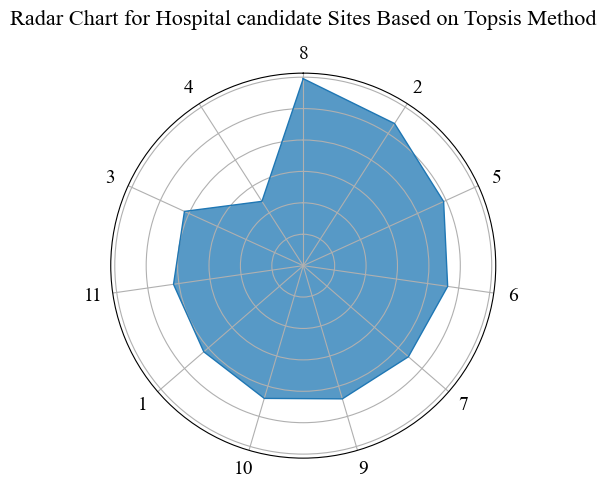

In [8]:
# Part 7 _ Radar Chart
scores = Sorted_Results[:, 1]
labels = Sorted_Results[:, 0]
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
scores = np.concatenate((scores,[scores[0]]))
angles += angles[:1]
fig, ax = plt.subplots(figsize=(5, 5), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.plot(angles, scores, linewidth=1, linestyle='solid')
ax.fill(angles, scores, alpha=0.75)
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels.astype(int), fontname='Times New Roman', fontsize=14)
ax.set_title("Radar Chart for Hospital candidate Sites Based on Topsis Method", fontname='Times New Roman',pad = 35 , fontsize=16)
plt.show()